In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_cities=pd.read_csv(r"D:\C6 Input Files\Dataset\dim_cities.csv")
df_respondents=pd.read_csv(r"D:\C6 Input Files\Dataset\dim_repondents.csv")
df_fact_survey_responses=pd.read_csv(r"D:\C6 Input Files\Dataset\fact_survey_responses.csv")

In [11]:
df_cities.head(5)

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [12]:
df_cities.isna().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [13]:
df_cities.dtypes

City_ID    object
City       object
Tier       object
dtype: object

In [14]:
df_respondents.head(5)

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [15]:
df_respondents.isna().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [16]:
df_respondents.dtypes

Respondent_ID     int64
Name             object
Age              object
Gender           object
City_ID          object
dtype: object

In [22]:
df_respondents["Respondent_ID"]=df_respondents["Respondent_ID"].astype(str)

In [23]:
df_respondents.dtypes

Respondent_ID    object
Name             object
Age              object
Gender           object
City_ID          object
dtype: object

In [24]:
df_fact_survey_responses.head(5)
df_fact_survey_responses.columns


Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [26]:
df_fact_survey_responses.dtypes

Response_ID                        int64
Respondent_ID                      int64
Consume_frequency                 object
Consume_time                      object
Consume_reason                    object
Heard_before                      object
Brand_perception                  object
General_perception                object
Tried_before                      object
Taste_experience                   int64
Reasons_preventing_trying         object
Current_brands                    object
Reasons_for_choosing_brands       object
Improvements_desired              object
Ingredients_expected              object
Health_concerns                   object
Interest_in_natural_or_organic    object
Marketing_channels                object
Packaging_preference              object
Limited_edition_packaging         object
Price_range                       object
Purchase_location                 object
Typical_consumption_situations    object
dtype: object

In [27]:
df_fact_survey_responses["Respondent_ID"]=df_fact_survey_responses["Respondent_ID"].astype(str)

**1.Demographic Insights**


**a. Who prefers energy drink more? (male/female/non-binary?)**

In [28]:
df_merge=pd.merge(df_fact_survey_responses,df_respondents, on=["Respondent_ID"])

In [29]:
df_merge.head(5)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120


Text(0.5, 1.0, 'Gender Distribution')

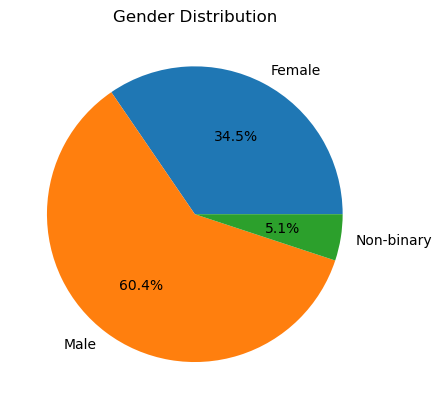

In [30]:
df_merge.groupby("Gender").size().plot(kind="pie",autopct='%1.1f%%')
plt.title("Gender Distribution")

**Answer: Male prefers energy drink more followed by Female and Non-binary**

**b)Which age group prefers energy drinks more?**

Text(0.5, 1.0, ' Energy Drink Prefernce based on Age Group')

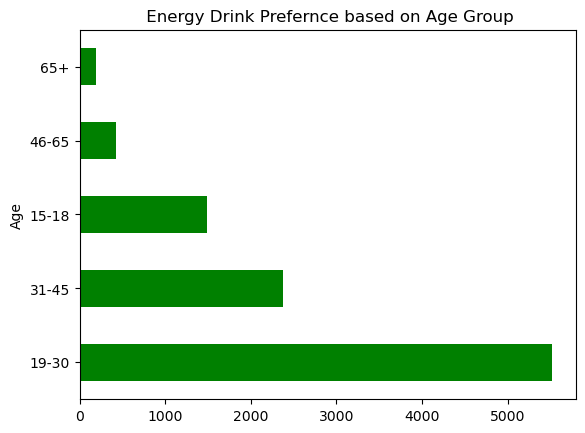

In [31]:
df_merge.groupby("Age").size().sort_values(ascending=False).plot(kind="barh",color="Green")
plt.title(" Energy Drink Prefernce based on Age Group")

**Answer: Age Group 19-30 prefer energy drink more followed by 31-45,15-18,46-65,65+**

**C)Which type of marketing reaches the most Youth (15-30)?**

In [32]:
df_filtered = df_merge[df_merge["Age"].isin(["15-18", "19-30"])]
g=df_filtered.groupby("Marketing_channels").size()
g

Marketing_channels
Online ads            3373
Other                  702
Outdoor billboards     702
Print media            446
TV commercials        1785
dtype: int64

<Axes: >

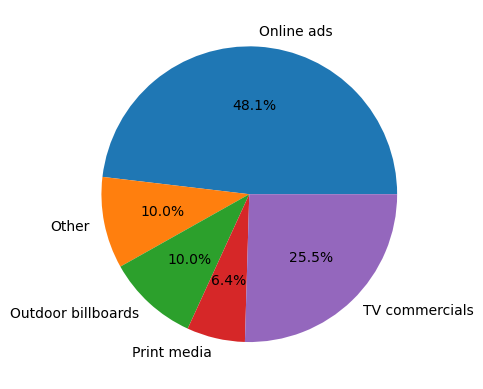

In [26]:
g.plot(kind="pie",autopct="%1.1f%%")

**Answer: Online ads reaches most youth**

**2.Consumer Preferences:**

**a. What are the preferred ingredients of energy drinks among respondents?**

In [33]:
df_ingredients_exp=df_fact_survey_responses.groupby('Ingredients_expected').size().sort_values(ascending=False)
df_ingredients_exp

Ingredients_expected
Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
dtype: int64

Text(0, 0.5, 'Count')

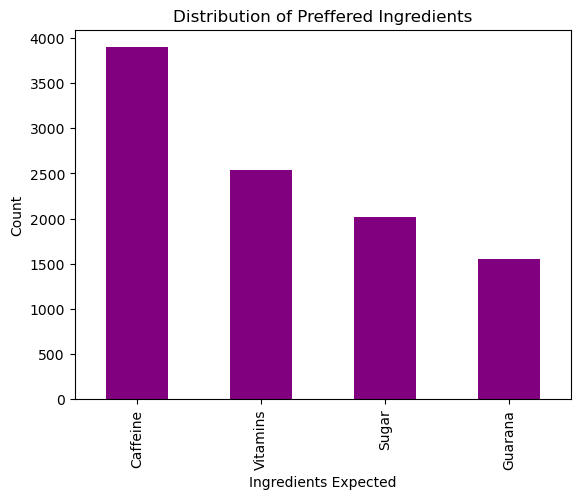

In [36]:
df_ingredients_exp.plot(kind='bar', x='Ingredients_expected', y='count', color='purple', legend=False)
plt.title("Distribution of Preffered Ingredients")
plt.xlabel("Ingredients Expected")
plt.ylabel("Count")

**Answer:Caffeine and Vitamins are the most preferred ingredients**

**What packaging preferences do respondents have for energy drinks?**

In [31]:
df_packaging_pref=df_fact_survey_responses.groupby('Packaging_preference').size().sort_values(ascending=False)
df_packaging_pre

Packaging_preference
Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
dtype: int64

Text(0, 0.5, 'Packaging Preference')

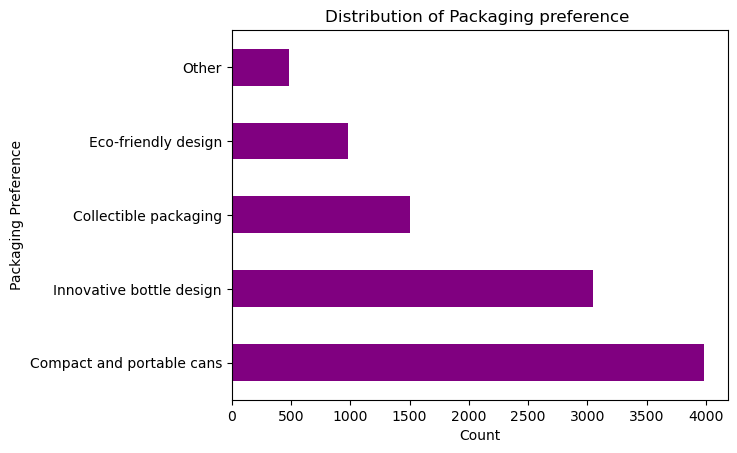

In [38]:
df_packaging_pref.plot(kind="barh",color="Purple",y="Packaging Preference")
plt.title("Distribution of Packaging preference ")
plt.xlabel("Count")
plt.ylabel("Packaging Preference")

**Answer:People prefer Compact and portable cans and Innovative bottle design**

**3. Competition Analysis:** 

**a. Who are the current market leaders?**

In [13]:
df_fact_survey_responses.groupby('Current_brands').size().sort_values(ascending=False).reset_index(name="count")

,Current_brands,count
0,Cola-Coka,2538
1,Bepsi,2112
2,Gangster,1854
3,Blue Bull,1058
4,CodeX,980
5,Sky 9,979
6,Others,479


**Answer:Current Market Leaders are Cola-Coka,Bepsi,Gangster**

**b.What are the primary reasons consumers prefer those brands over ours?** 

In [29]:
df_filter_brands=df_fact_survey_responses[df_fact_survey_responses['Current_brands'].isin(["Cola-Coka","Bepsi","Gangster","Blue Bull"])]

In [30]:
df_filter_brands.groupby(['Reasons_for_choosing_brands']).size().sort_values(ascending=False).reset_index(name="count")

,Reasons_for_choosing_brands,count
0,Brand reputation,1993
1,Taste/flavor preference,1548
2,Availability,1447
3,Effectiveness,1297
4,Other,1277


**People mostly prefer other brands because of it brand reputation followed by their Taste/flavor preference,Availability,Effectiveness,Other reasons**

**4. Marketing Channels and Brand Awareness:**

**a. Which marketing channel can be used to reach more customers?**

<Axes: >

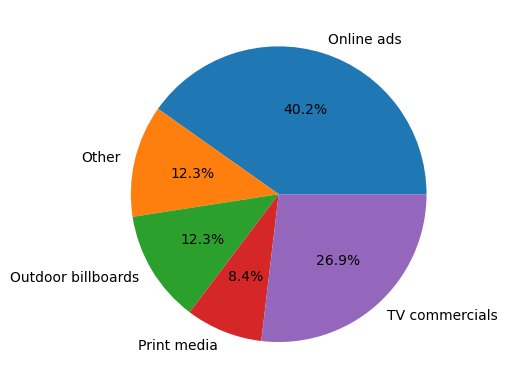

In [43]:
df_fact_survey_responses.groupby('Marketing_channels').size().plot(kind="pie",autopct="%1.1f%%")

**Answer:Online ads and TV commercials can be used to reach customers**

**b. How effective are different marketing strategies and channels in reaching our 
customers?**

In [53]:
df_marketing_channels=df_fact_survey_responses.groupby('Marketing_channels').size().reset_index(name="Total Count of Marketing Channels")
df_marketing_channels.sort_values(by='Total Count of Marketing Channels',ascending=False)

,Marketing_channels,Total Count of Marketing Channels
0,Online ads,4020
4,TV commercials,2688
2,Outdoor billboards,1226
1,Other,1225
3,Print media,841


In [59]:
df_mar_age=df_merge.groupby(['Age','Marketing_channels']).size().reset_index(name="Count of Marketing Channels")
df_merge2=pd.merge(df_mar_age,df_marketing_channels,on=['Marketing_channels'])
df_merge2['% Reach']=((df_merge2['Count of Marketing Channels']/df_merge2['Total Count of Marketing Channels'])*100).round(2)
df_merge2=df_merge2.sort_values(by='Total Count of Marketing Channels',ascending=False)


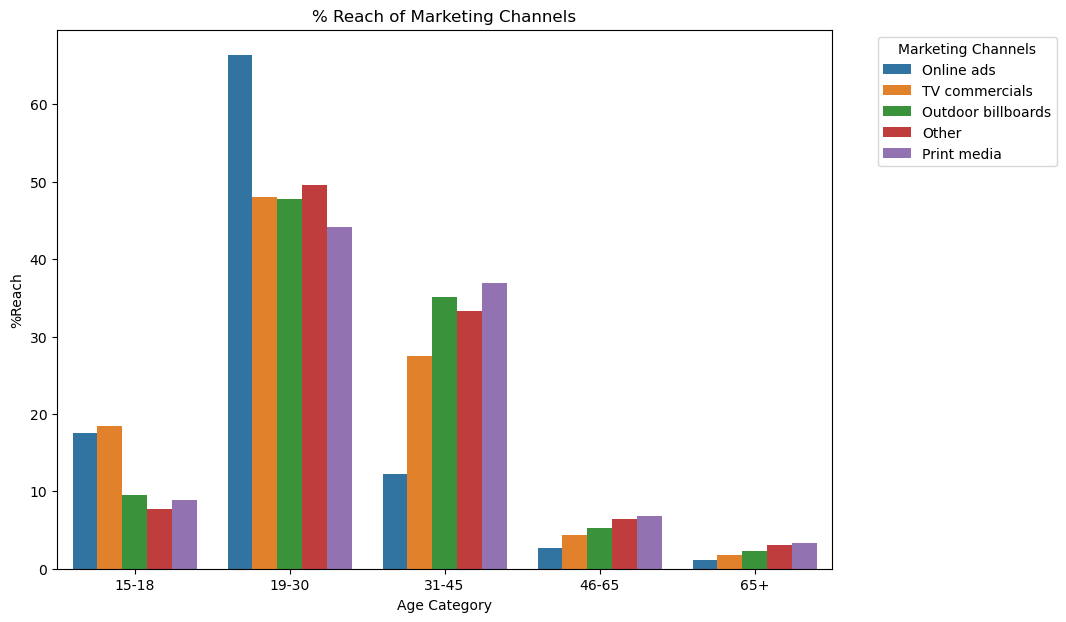

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(data=df_merge2, x='Age', y='% Reach', hue='Marketing_channels')
plt.title('% Reach of Marketing Channels')
plt.xlabel('Age Category')
plt.ylabel('%Reach')
plt.legend(title='Marketing Channels', bbox_to_anchor=(1.05, 1), loc='upper left')

**Answer:% Reach of online ads is more in age category 19-30**

**5. Brand Penetration:**

**a. What do people think about our brand? (overall rating)**

In [34]:
df_codex=df_merge[df_merge['Current_brands'].isin(["CodeX"])]
Overall_Rating=df_codex['Taste_experience'].mean().round(2)
print("Overall Rating:",Overall_Rating)

Overall Rating: 3.27


**b. Which cities do we need to focus more on?**

<Axes: ylabel='City'>

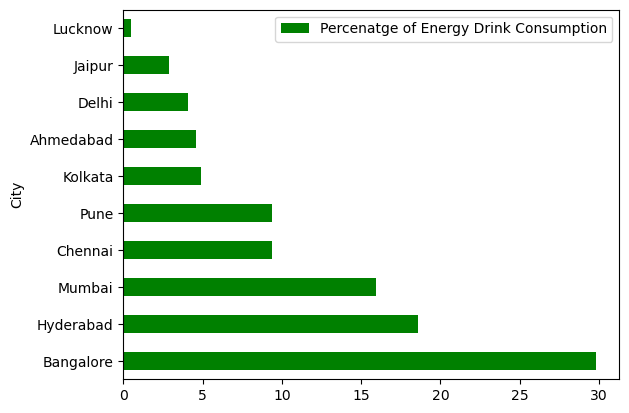

In [83]:
df_merge_cities=pd.merge(df_codex,df_cities,on='City_ID')
x=df_merge_cities.groupby('City').size().sort_values(ascending=False).reset_index(name="Count of Energy Drink Consumption")
x["Percenatge of Energy Drink Consumption"]=(x["Count of Energy Drink Consumption"]/x["Count of Energy Drink Consumption"].sum())*100
x[['City','Percenatge of Energy Drink Consumption']].plot(kind="barh",x='City',color="green")

**Answer:We should focus on Bangalore,Hyderabad,Mumbai**

                                                    **6. Purchase Behavior:**

**a. Where do respondents prefer to purchase energy drinks?**

In [46]:
df_fact_survey_responses.groupby("Purchase_location").size().sort_values(ascending=False).reset_index(name="Purchase Count")

,Purchase_location,Purchase Count
0,Supermarkets,4494
1,Online retailers,2550
2,Gyms and fitness centers,1464
3,Local stores,813
4,Other,679


**Answer:They prefer Supermarkets,Online retailers,Gyms and fitness centers**

**b. What are the typical consumption situations for energy drinks among  respondents?**

In [5]:
df_fact_survey_responses.groupby("Typical_consumption_situations").size().sort_values(ascending=False).reset_index(name="Frequency of Consumption")

,Typical_consumption_situations,Frequency of Consumption
0,Sports/exercise,4494
1,Studying/working late,3231
2,Social outings/parties,1487
3,Other,491
4,Driving/commuting,297


**Answer:People consume Energy drinks more during sports/excercise and when they study and work**

**c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?** 

Text(0.5, 1.0, 'Distribution of Limited Edition Packaging')

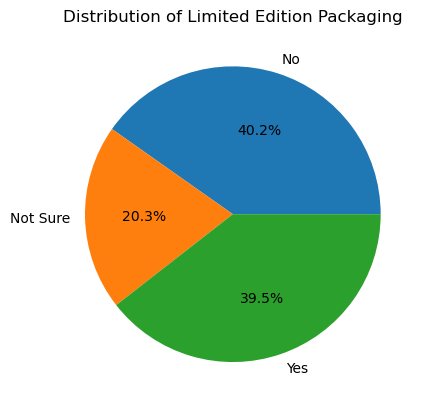

In [65]:
df_fact_survey_responses.groupby(['Limited_edition_packaging']).size().plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Limited Edition Packaging")

Text(0.5, 1.0, 'Distribution of Price Range')

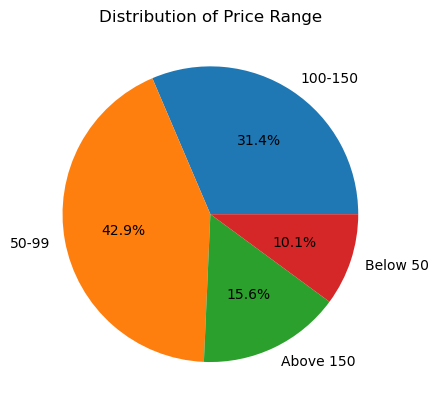

In [71]:
df_fact_survey_responses.groupby(['Price_range']).size().plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Price Range")

**Answer:40.2% of the consumers do not expect a change in the packaging while 39.5% of consumers are open to trying the Limited Edition Packaging.
42.9% people prefer price range of 50-99 Rs**

**7. Product Development**

**a. Which area of business should we focus more on our product development? (Branding/taste/availability)**

In [37]:
df_codex.groupby('Taste_experience').size().reset_index(name="Response Frequency")

,Taste_experience,Response Frequency
0,1,107
1,2,148
2,3,286
3,4,248
4,5,191


In [95]:
df_codex.query('Reasons_preventing_trying=="Not available locally"').groupby('Reasons_preventing_trying').size()
x=df_codex.groupby('Reasons_preventing_trying').size()
x

Reasons_preventing_trying
Not available locally    229
dtype: int64

<Axes: >

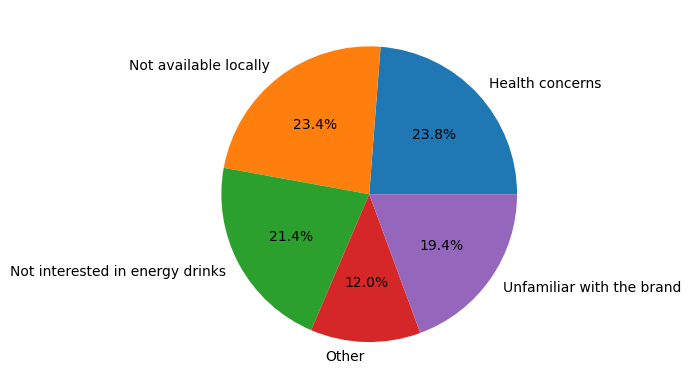

In [39]:
df_codex.groupby('Reasons_preventing_trying').size().plot(kind="pie",autopct="%1.1f%%")


**Answer:About 23.4% people are unable to try because of its Unavailability** 

In [41]:
df_codex.groupby('Brand_perception').size().sort_values(ascending=False).reset_index(name="Response Frequency")

,Brand_perception,Response Frequency
0,Neutral,589
1,Positive,219
2,Negative,172


**Answer:Only 219 people have positive response**

**Recommendations to Marketing Team:**

**1.What immediate improvements can we bring to the product?**

**Answer:Based on the response we should focus on
1.Product Availability
2.Packaging- Compact Portable cans
3.Ingredients- Caffeine and vitamins more**


**2.What should be the ideal price of our product?**

**Answer:Based on the response people majority of people prefer Price Range-50-150**

**3.What kind of marketing campaigns, offers, and discounts we can run?**

**Answer:Since reach of online ads are more the age group 19-30, marketing campaings through social media influencers(mainly instagram) 
  can have potential impact and also by providing exclusive offers in limited edition packaging can create hype among aundience**


**4.Who can be a brand ambassador, and why?**

**Answer: A suitable brand ambassador should possess nationwide recognition and appeal to our target audience, primarily located in Bangalore, Hyderabad, and Mumbai.
Considering these requirements, I recommend Yash, the star of KGF, and Rashmika Mandanna. 
Both celebrities have achieved widespread fame across India and maintain strong connections with the audience.**